#워드클라우드

In [1]:
# 한글 폰트 설치
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시 시작

In [1]:
!pip install Konlpy > /dev/null

In [2]:
from google.colab import files
uploaded = files.upload()
textfile = list(uploaded.keys())[0]

Saving perfume_blog.txt to perfume_blog.txt


In [68]:
uploaded = files.upload()
maskfile = list(uploaded.keys())[0]

Saving chanel_perfume.jpg to chanel_perfume.jpg


## 한글 텍스트 전처리

In [69]:
with open(textfile) as fp:
    text = fp.read()

In [70]:
from konlpy.tag import Okt
okt = Okt()

In [71]:
tokens = okt.nouns(text)
tokens[:10]

['장미', '향수', '비교', '전', '로', '향수', '사실', '꽤', '향수', '알']

In [72]:
# 영문자, 숫자 제거 
import re
new_tokens = []
for token in tokens:
    item = re.sub('[A-Za-z0-9]', '', token)
    if item: 
        new_tokens.append(item)

In [73]:
# 한글폰트 사용
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

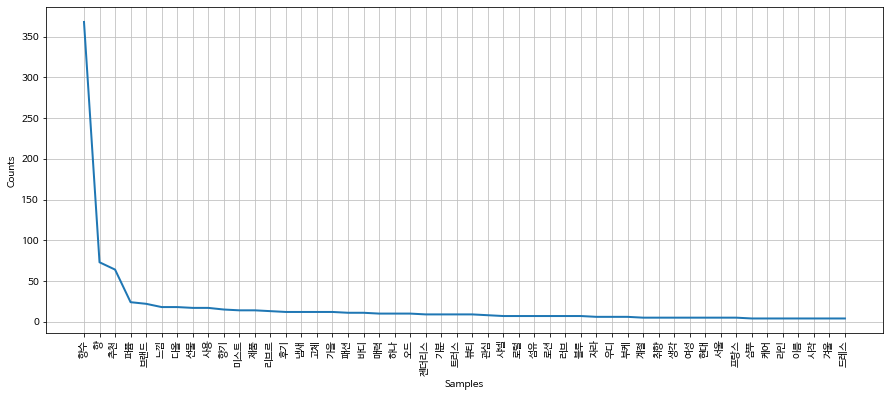

In [76]:
perfume = nltk.Text(new_tokens, name='향수')
plt.figure(figsize=(15,6))
perfume.plot(50)
plt.show()

In [75]:
stoptext = """
    전 치 나 것 제 헤어 소개 요즘 오늘 저 때 에르 니아 가지 더 이 오 요 수 리뷰 바 이레
    이번 스 유 드 사람 정말 바로 팝업 스토어 에이 그 알 중 쥬 또 디 뿌리 원래 꼭 데 해 
    딕트 로 글 론 미스 도랑 조말 엑스 분 사실 퓨저 어제 달 프레 딥디 가장 출시 힐로 해나
    밍 살 트 다른 인생 남자 여자 쫌 지난 니 블로거 품 온 앤 날 포스팅 갑자기 매장 이제 구매 
    비교 가로수길 조금 얼마 브러쉬 완전 날씨 페인트 여름 쉬
"""
stop_words = stoptext.split()
new_tokens = [word for word in new_tokens if word not in stop_words]
new_tokens[:10]

['장미', '향수', '향수', '꽤', '향수', '혹시', '분도', '새', '누드', '인']

## 워드클라우드 그리기

In [77]:
from wordcloud import WordCloud
from PIL import Image

In [78]:
data = perfume.vocab().most_common(300)
path ='/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(font_path=path, relative_scaling=0.2,
               background_color='white'
).generate_from_frequencies(dict(data))

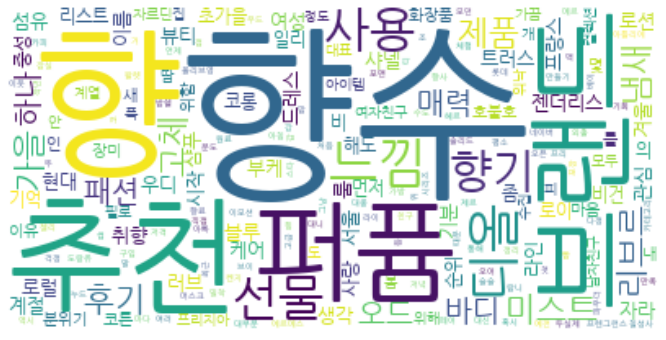

In [79]:
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 로고 그림에 표시

In [80]:
mask = np.array(Image.open(maskfile))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [81]:
wc = WordCloud(font_path=path, relative_scaling=0.2,
               background_color='white', mask=mask,
               min_font_size=1, max_font_size=120
).generate_from_frequencies(dict(data))

In [94]:
import random
def chanel_color(word, font_size, position,
               orientation,random_state=None, **kwargs):
    return f'hsl({np.random.randint(150, 280)}, {np.random.randint(20, 100)}%, {np.random.randint(50, 80)}%)'

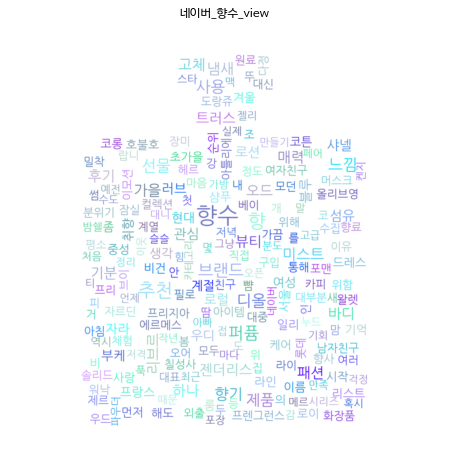

In [109]:
plt.figure(figsize=(8,8))
plt.imshow(wc.recolor(color_func=chanel_color), interpolation='bilinear')
plt.axis('off')
plt.title('네이버_향수_view')
# plt.show() 이미지 확인하고 저장할 땐 주석처리!
plt.savefig('perfume_naver.png')

In [108]:
plt.savefig('perfume_naver.png')

<Figure size 432x288 with 0 Axes>